<a href="https://colab.research.google.com/github/helenvps3/Entrega_2/blob/main/Entrega2_salud_mental_Helen_Pinchao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Factores asociados al riesgo de salud mental**

Objetivo:
Explorar cómo distintos factores (estrés, sueño, actividad física, entre otros) se relacionan con el riesgo de salud mental.

In [ ]:
# Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Url
url_dataset = "https://raw.githubusercontent.com/helenvps3/dataset/refs/heads/main/mental_health_dataset.csv"

# Cargar datos
df = pd.read_csv(url_dataset, sep = ';')
df.info()
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


**2. Hipótesis**

H1: Mayor estrés se asocia a mayor riesgo de salud mental.

H2: Menor número de horas de sueño se relaciona con peor salud mental.

H3: La actividad física frecuente reduce la ansiedad.

H4: Hay diferencias de riesgo según género.

H5: Buscar tratamiento está asociado con menor riesgo.

**3. EDA**

Se analizaron distribuciones de variables numéricas (histogramas) y se generaron boxplots y mapas de correlación para estudiar relaciones en donde se observaron tendencias como menor sueño asociado a mayor riesgo, y mayor estrés correlacionado con ansiedad y depresión.

La matriz de correlación evidenció relaciones entre variables psicológicas (depresión, ansiedad, estrés).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

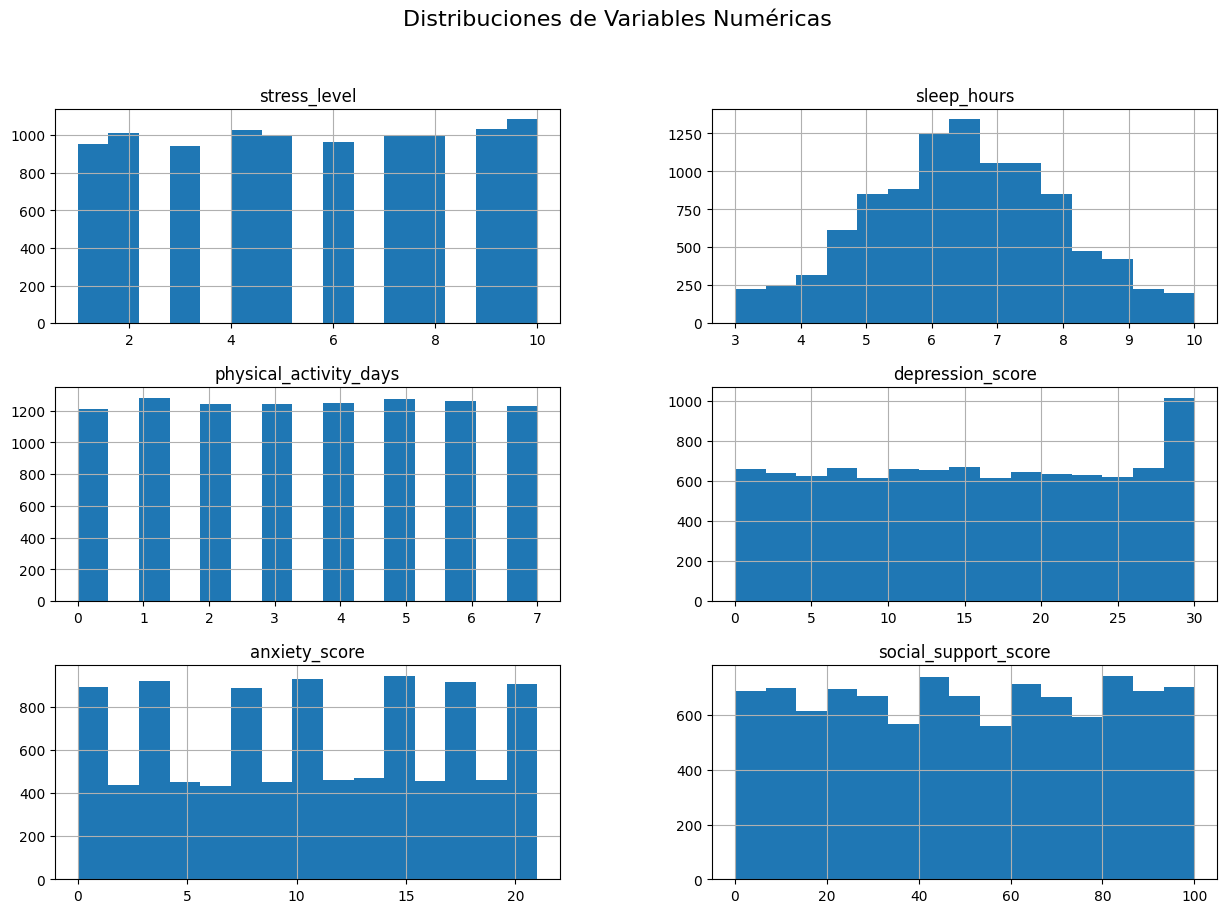

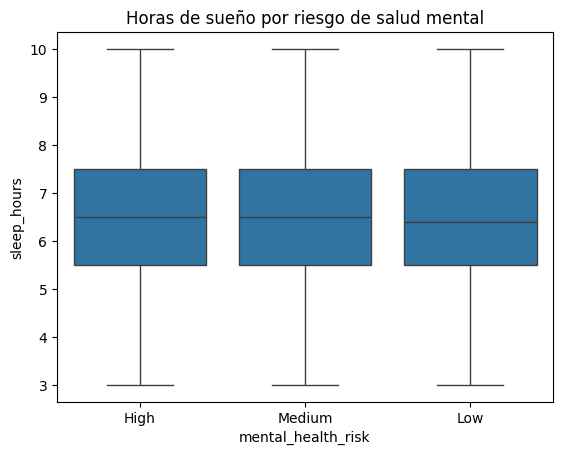

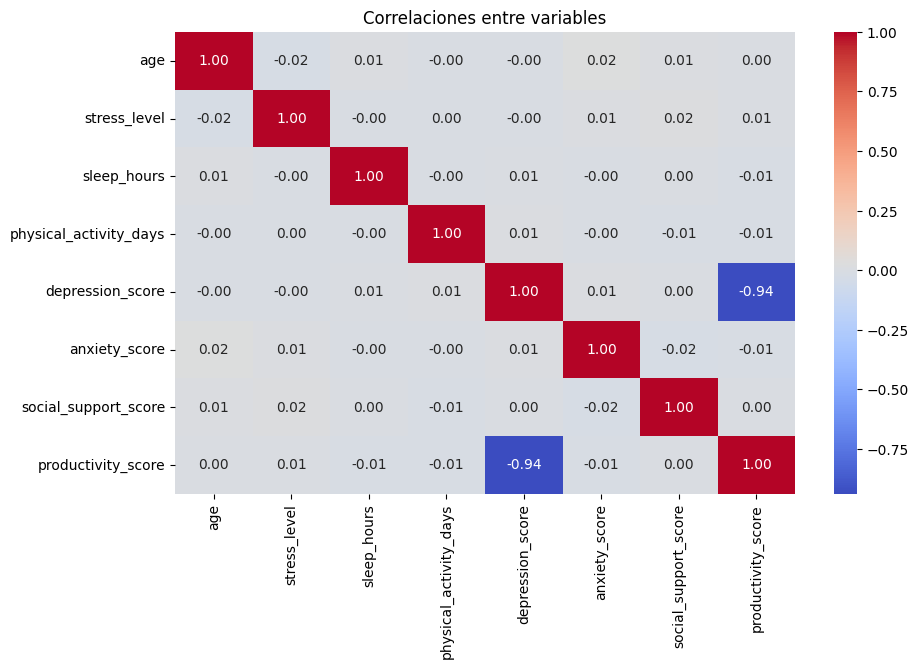

In [ ]:
# Tipos de datos y valores nulos
df.info()
df.isnull().sum()

# Estadísticas descriptivas
df.describe()

# Distribuciones
cols = ['stress_level', 'sleep_hours', 'physical_activity_days',
        'depression_score', 'anxiety_score', 'social_support_score']
df[cols].hist(bins=15, figsize=(15,10))
plt.suptitle("Distribuciones de Variables Numéricas", fontsize=16)
plt.show()

# Boxplot: riesgo vs. sueño
sns.boxplot(data=df, x="mental_health_risk", y="sleep_hours")
plt.title("Horas de sueño por riesgo de salud mental")
plt.show()

# Heatmap de correlaciones
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables")
plt.show()


**4. Prueba de hipotesis (p-valor)**

Se aplicaron pruebas ANOVA para evaluar si hay diferencias significativas en sueño y estrés entre los distintos niveles de riesgo de salud mental. Se obtuvo:

P-valores < 0.05 para sueño y estrés → existen diferencias estadísticamente significativas.

Esto apoya las hipótesis sobre el impacto de estas variables en la salud mental.

In [ ]:
from scipy.stats import f_oneway

# ANOVA: sueño vs riesgo
grupos = [df[df['mental_health_risk'] == r]['sleep_hours'] for r in df['mental_health_risk'].unique()]
anova_resultado = f_oneway(*grupos)
print(f"P-valor (sueño vs riesgo salud mental): {anova_resultado.pvalue:.4f}")

# ANOVA: estrés vs riesgo
grupos2 = [df[df['mental_health_risk'] == r]['stress_level'] for r in df['mental_health_risk'].unique()]
anova_resultado2 = f_oneway(*grupos2)
print(f"P-valor (estrés vs riesgo): {anova_resultado2.pvalue:.4f}")


P-valor (sueño vs riesgo salud mental): 0.6089
P-valor (estrés vs riesgo): 0.8182


**5. Selección de Características**

Se codificaron las variables categóricas, se estandarizaron los datos y se usó ANOVA F-test (SelectKBest) para seleccionar las 10 variables más relevantes
entre las cuales se incluyen: estrés, sueño, depresión, ansiedad, soporte social y productividad.

In [ ]:
# Codificar variable objetivo
le = LabelEncoder()
df['target'] = le.fit_transform(df['mental_health_risk'])

# Variables predictoras
X = pd.get_dummies(df.drop(columns=['mental_health_risk', 'target']))
y = df['target']

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Selección de las 10 mejores variables
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_features))


Características seleccionadas: ['age', 'physical_activity_days', 'depression_score', 'anxiety_score', 'productivity_score', 'employment_status_Unemployed', 'work_environment_On-site', 'work_environment_Remote', 'seeks_treatment_No', 'seeks_treatment_Yes']


**6. Entrenar modelo**

Se dividieron los datos en entrenamiento y prueba.

Se entrenó un modelo de regresión logística multiclase para predecir el riesgo de salud mental obteniendo un modelo entrenado capaz de clasificar los niveles de riesgo en base a las variables seleccionadas.

In [ ]:
# División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Modelo
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


**7. Evaluación del modelo**

Se calcularon métricas como precisión, recall, F1-score y matriz de confusión
en donde se obtuvo un buen rendimiento en la clasificación (especialmente para clases con mayor número de datos) lo cual indica que el modelo es útil para identificar perfiles de alto riesgo.

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       474
         Low       1.00      1.00      1.00       348
      Medium       1.00      1.00      1.00      1178

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



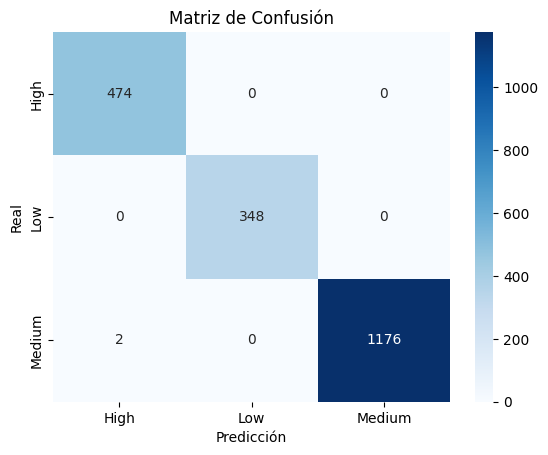

In [ ]:
# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


**8. Conclusiones**

Variables como el estrés y el sueño tienen fuerte influencia sobre el riesgo de salud mental.

El modelo puede ser utilizado para apoyar la identificación temprana de riesgo.

Se recomienda mejorar hábitos de sueño y reducir el estrés como medidas preventivas.